1. Import modules

In [33]:
import pandas as pd
import numpy as np
import pydotplus
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
import matplotlib.pyplot as plt
import matplotlib.image as pltimg


In [34]:
df = pd.read_csv ("breastcancer.csv")

df.head()

,Class,Age,Me1pause,Tumor Size,INV-1des,1de-Caps,Deg-Malig,Breast,Irradiat
0,0,35,0,32,1,1,3,1,1
1,0,45,0,22,1,1,2,0,1
2,0,45,0,22,1,1,2,1,1
3,0,65,1,17,1,1,2,0,1
4,0,45,0,2,1,1,2,0,1


In [11]:
df.Class.unique()

array([0, 1])

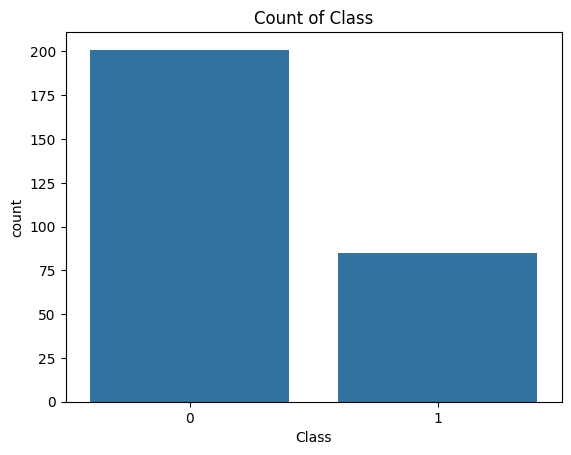

In [35]:
import seaborn as sns
sns.countplot(data=df, x='Class')
plt.title('Count of Class')
plt.show()

In [36]:
print(df.groupby('Class').size())

Class
0    201
1     85
dtype: int64


2. Split the dataset into testing and training sets

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,df.columns != 'Class'], df['Class'],
stratify=df['Class'], random_state=66)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Class       286 non-null    int64
 1   Age         286 non-null    int64
 2   Me1pause    286 non-null    int64
 3   Tumor Size  286 non-null    int64
 4   INV-1des    286 non-null    int64
 5   1de-Caps    286 non-null    int64
 6   Deg-Malig   286 non-null    int64
 7   Breast      286 non-null    int64
 8   Irradiat    286 non-null    int64
dtypes: int64(9)
memory usage: 20.2 KB


3. Split the features and target variables

In [15]:
features = ['Age', 'Me1pause', 'Tumor Size', 'INV-1des', '1de-Caps', 'Deg-Malig', 'Breast', 'Irradiat']

X = df[features] #input
y = df['Class'] #target

print(X)
print(y)

     Age  Me1pause  Tumor Size  INV-1des  1de-Caps  Deg-Malig  Breast  \
0     35         0          32         1         1          3       1   
1     45         0          22         1         1          2       0   
2     45         0          22         1         1          2       1   
3     65         1          17         1         1          2       0   
4     45         0           2         1         1          2       0   
..   ...       ...         ...       ...       ...        ...     ...   
281   35         0          32         1         1          2       1   
282   35         0          22         1         1          3       1   
283   65         1          22         1         1          1       0   
284   45         1          32         5         1          3       1   
285   55         1          32         5         1          3       1   

     Irradiat  
0           1  
1           1  
2           1  
3           1  
4           1  
..        ...  
281        

4. Model evaluation using Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.958
Accuracy on test set: 0.611


The accuracy of training set is 100% and testing set is 71.40%. This indicates overfitting, therefore we need to apply pre-prunning to the tree. We will add a max_depth= 3 (limiting the depth/ branching of tree).

In [17]:
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.799
Accuracy on test set: 0.708


5. Feature Importance in Decision Trees

In [18]:
print("Feature importances:\n{}".format(tree.feature_importances_)) #function for feature importance- to see the importance to attrib

Feature importances:
[0.14911611 0.         0.26648787 0.15287189 0.         0.21670122
 0.10650167 0.10832125]


6. Visualization of feature importance

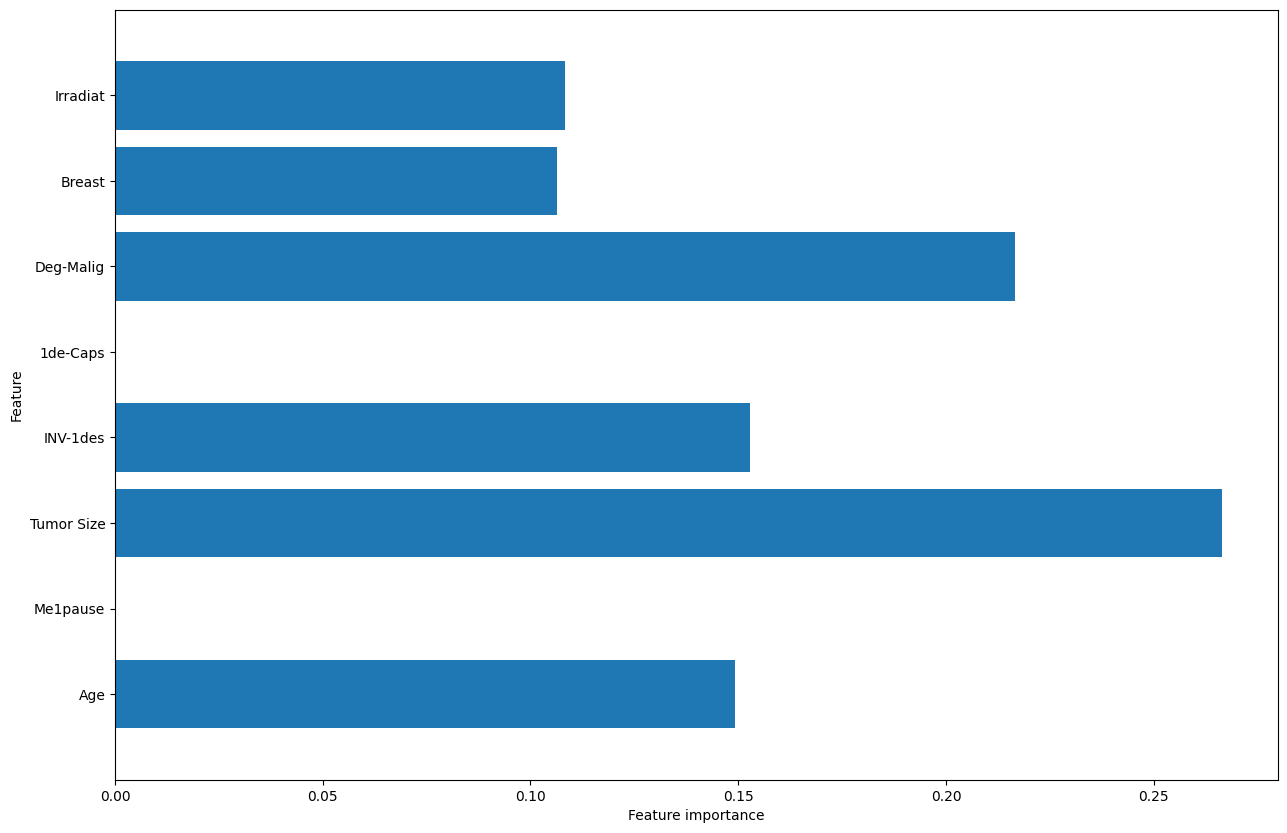

In [28]:
def plot_feature_importances_breastcancer(model): #define function #provide message
    plt.figure(figsize=(15,10))
    n_features = 8  #total number of input features
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features) #the spelling arange are correct
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_breastcancer(tree) #calling the function

In [29]:
important_features = ['Age', 'Me1pause', 'Tumor Size', 'INV-1des', '1de-Caps', 'Deg-Malig', 'Breast', 'Irradiat']

f = df[important_features] #input
t = df['Class'] #target
#select the diagnostic analy - predictive - filter only importance info
print(f)
print(t)

     Age  Me1pause  Tumor Size  INV-1des  1de-Caps  Deg-Malig  Breast  \
0     35         0          32         1         1          3       1   
1     45         0          22         1         1          2       0   
2     45         0          22         1         1          2       1   
3     65         1          17         1         1          2       0   
4     45         0           2         1         1          2       0   
..   ...       ...         ...       ...       ...        ...     ...   
281   35         0          32         1         1          2       1   
282   35         0          22         1         1          3       1   
283   65         1          22         1         1          1       0   
284   45         1          32         5         1          3       1   
285   55         1          32         5         1          3       1   

     Irradiat  
0           1  
1           1  
2           1  
3           1  
4           1  
..        ...  
281        

7. Create decision tree using important features

In [30]:
# Create and fit the decision tree
clf_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
clf_dt.fit(f, t)

# Export resulting tree to DOT source code string
dot_data = export_graphviz(clf_dt,
                                feature_names=important_features,
                                out_file=None,
                                filled=True,
                                rounded=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('tree2.png')


True

In [31]:
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz

tree_rules = export_text(clf_dt, feature_names=important_features)
print(tree_rules)

|--- Deg-Malig <= 2.50
|   |--- Tumor Size <= 14.50
|   |   |--- Age <= 40.00
|   |   |   |--- class: 0
|   |   |--- Age >  40.00
|   |   |   |--- class: 0
|   |--- Tumor Size >  14.50
|   |   |--- INV-1des <= 2.00
|   |   |   |--- class: 0
|   |   |--- INV-1des >  2.00
|   |   |   |--- class: 0
|--- Deg-Malig >  2.50
|   |--- INV-1des <= 2.00
|   |   |--- Tumor Size <= 24.50
|   |   |   |--- class: 0
|   |   |--- Tumor Size >  24.50
|   |   |   |--- class: 1
|   |--- INV-1des >  2.00
|   |   |--- Tumor Size <= 42.00
|   |   |   |--- class: 1
|   |   |--- Tumor Size >  42.00
|   |   |   |--- class: 0

